In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

ROOT = "/content/drive/MyDrive"
os.chdir(ROOT)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [13]:
car1 = mpimg.imread("car1.jpeg")

In [16]:
car1.shape  #168x300 size matrices and 1 for each R,G,B

(168, 300, 3)

In [17]:
type(car1)

numpy.ndarray

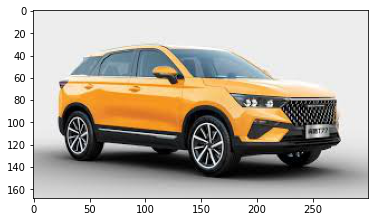

In [18]:
plt.imshow(car1)  #(0,0) starts from the top-left corner just like [0,0] in matrices

In [19]:
car1_cv2 = cv2.imread("car1.jpeg")

In [20]:
cv2.imshow(car1_cv2)

'''DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow'''

DisabledFunctionError: ignored

In [24]:
from google.colab.patches import cv2_imshow

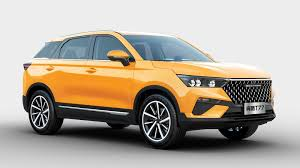

In [26]:
cv2_imshow(car1_cv2)

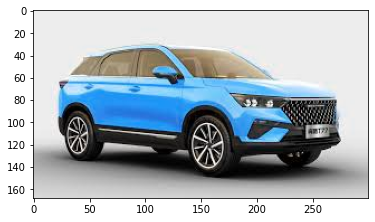

In [27]:
plt.imshow(car1_cv2)

# color is different becayuse cv2 reads data as B,G,R and matplotlib reads as R,G,B

In [28]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)

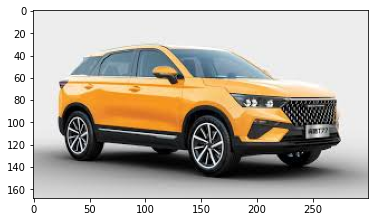

In [29]:
plt.imshow(car1_cv2_BGR_RGB)

In [30]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)

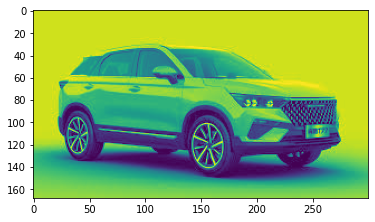

In [31]:
plt.imshow(car1_cv2_BGR_GRAY)

# shows colored image because we have not specified the colormap value

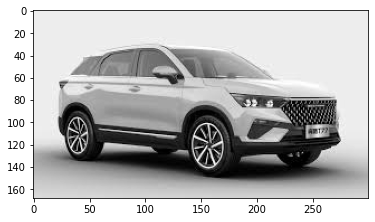

In [32]:
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [33]:
car1_cv2_BGR_GRAY.shape

# 168x300 because it is grayscale image

(168, 300)

In [34]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

In [35]:
cv2.imwrite("car1_graysacle.jpeg", car1_cv2_BGR_GRAY)

True

In [36]:
car1_cv2_BGR_GRAY[0,0]

237

# Composition of colored images

In [49]:
def visualize_RGB_channels(imgArray=None, fig_size=(10,7)):
  # splitting the colored image into RGD components
  B, G, R = cv2.split(imgArray)

  # zero matrix
  Z = np.zeros(B.shape, dtype=B.dtype)

  # initialise subplots to draw 4 images - original and R, G, B
  fig, ax = plt.subplots(2,2,figsize=fig_size)

  # we will be merging the zero matrix with the BG, GR, RB components to get individual R, B, G components 

  # ravel() will flatten the values in the ax. ax is an array of (2,2). So ravel() will flatten it so that it can be put in a list
  # for every plot we will be setting the X, Y axes off
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

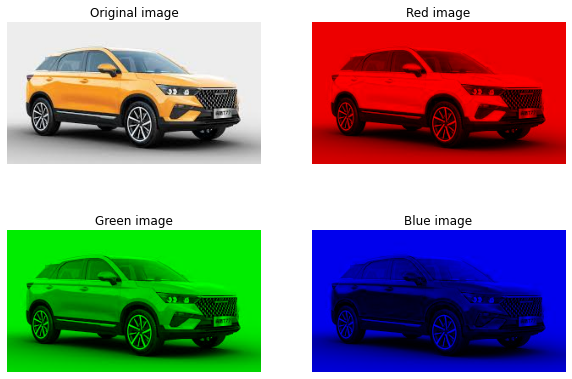

In [50]:
visualize_RGB_channels(car1_cv2)

In [64]:
random_colored_image = np.random.randint(0, 255, (6,6,3))

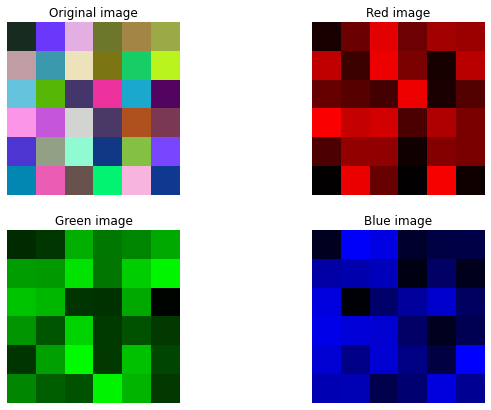

In [65]:
visualize_RGB_channels(random_colored_image)

In [122]:
random_colored_image[3,4,:]  # last pixel is blue in color hence the pixel has dominating B intensity =145 compared to G and R

array([ 31,  81, 174])

In [72]:
random_colored_image

array([[[ 32,  43,  24],
        [250,  55, 107],
        [226, 175, 227],
        [ 44, 119, 109],
        [ 69, 133, 163],
        [ 71, 169, 155]],

       [[165, 157, 192],
        [173, 153,  59],
        [186, 227, 237],
        [ 19, 118, 123],
        [101, 206,  22],
        [ 29, 245, 185]],

       [[222, 195, 102],
        [  7, 183,  87],
        [107,  53,  68],
        [157,  50, 238],
        [204, 169,  26],
        [ 97,   4,  83]],

       [[232, 149, 250],
        [217,  85, 197],
        [209, 212, 210],
        [103,  57,  74],
        [ 31,  81, 174],
        [ 82,  56, 122]],

       [[210,  53,  77],
        [134, 160, 146],
        [211, 250, 144],
        [132,  56,  17],
        [ 67, 193, 132],
        [254,  69, 122]],

       [[178, 134,   2],
        [180,  93, 235],
        [ 76,  81, 103],
        [113, 243,   2],
        [223, 180, 246],
        [145,  56,  15]]])

# Filters

In [123]:
# SOBEL FILTER

In [124]:
sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

#Sobel filters are used for edge detection. Imagine viewing a house from a distance with very small vertical slit. You will be able to clearly observe just the vertical edges. If we rotate the slit, then we will be clearly able to observe just the horizontal edges. This is the idea of a Sobel filter

In [127]:
sobel
# vertical sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [128]:
sobel.T 
# Horizontal sobel

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [129]:
ex = [[0,0,0,255,255,255],
      [0,0,0,255,255,255],
      [0,0,0,255,255,255],
      [0,0,0,255,255,255],
      [0,0,0,255,255,255],
      [0,0,0,255,255,255]]

In [130]:
ex = np.array(ex)

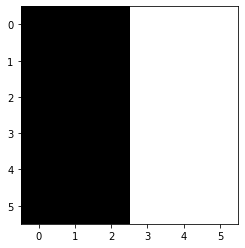

In [132]:
plt.imshow(ex, cmap='gray')

In [134]:
ex_T = ex.T

In [135]:
ex_T

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255]])

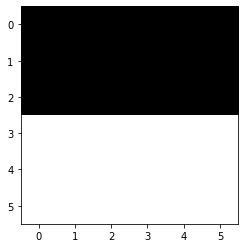

In [136]:
plt.imshow(ex_T, cmap="gray")

# Applying sobel filter

In [170]:
def find_edges(imgFilter=None, picture=None):
  # extract row, col of picture and filter

  p_row, p_col = picture.shape

  k = imgFilter.shape[0]  # k=3 as sobel as it is a square filter

  temp = list()

  stride = 1

  # resultant o/p matrix size
  final_rows = (p_row - k) // stride + 1
  final_cols = (p_col - k) // stride + 1

  # Take vertically down stride across rows
  for vertical_stride in range(final_rows):
    for horizontal_stride in range(final_cols):

      target_area_of_pic = picture[vertical_stride: vertical_stride + k, horizontal_stride: horizontal_stride + k]
      temp.append(sum(sum(imgFilter * target_area_of_pic)))

  return np.array(temp).reshape(final_rows, final_cols)

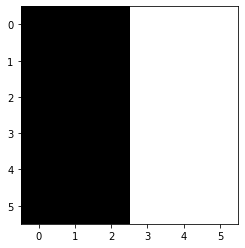

In [171]:
plt.imshow(ex, cmap="gray")

In [172]:
sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [173]:
result = find_edges(sobel, ex)

In [174]:
result

array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

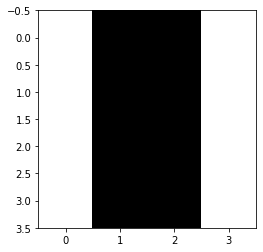

In [175]:
plt.imshow(result, cmap="gray")

# black portion signifies that edge portion is at the center

In [176]:
result2 = find_edges(sobel, ex_T)

In [177]:
result2

# we have a vertical sobel and horizontal edges and hence we get all 0's

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [178]:
result3 = find_edges(sobel.T, ex_T)
result3

# horizontal sobe and horizontal picture

array([[    0,     0,     0,     0],
       [-1020, -1020, -1020, -1020],
       [-1020, -1020, -1020, -1020],
       [    0,     0,     0,     0]])

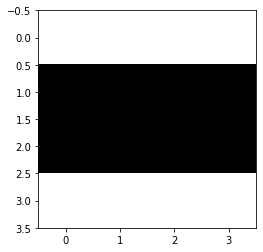

In [179]:
plt.imshow(result3, cmap="gray")

In [180]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
car1_cv2_BGR_GRAY

array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       ...,
       [216, 216, 216, ..., 211, 211, 211],
       [217, 217, 217, ..., 213, 213, 213],
       [217, 217, 217, ..., 214, 214, 214]], dtype=uint8)

In [181]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [184]:
car_sobel_1 = find_edges(sobel, car1_cv2_BGR_GRAY)

# vertical sobel

In [185]:
car_sobel_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

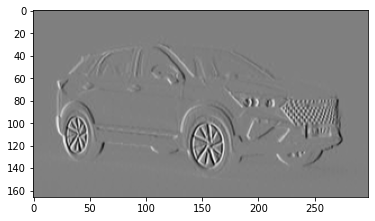

In [186]:
plt.imshow(car_sobel_1, cmap="gray")

In [187]:
car_sobel_2 = find_edges(sobel.T, car1_cv2_BGR_GRAY)

# horizontal sobel

In [188]:
car_sobel_2

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [-12, -12, -12, ..., -16, -16, -16],
       [-12, -12, -12, ..., -16, -16, -16],
       [ -4,  -4,  -4, ..., -12, -12, -12]])

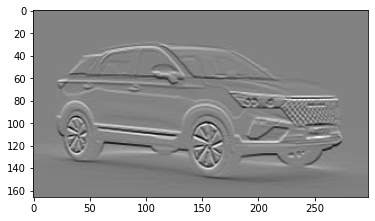

In [190]:
plt.imshow(car_sobel_2, cmap="gray")